# Números aleatorios
La mayoria de los lenguajes de programación tienen funciones o modules para la generación de números aleatorios. En Python uno de ellso es el modulo random. En el, la función <code>random.random()</code> genera numeros aleatorios en la mitad de un intervalo abierto
Python has a module random for generating random numbers. The function call random.random() generates a random number in the half open interval 

In [ ]:
%matplotlib notebook
import random
random.random()

Segun la naturaleza de algoritmos para generar números aleatorios, estos pueden perder la aleatoridad a medida que se alcanzan grandes números de eventos. Otra cosa a considerar es el uso de semillas, para replicar el valor obtenido en cada oportunidad.

In [ ]:
random.seed(123)
['%.2f' % random.random() for i in range(7)]



Si no consideramos la semilla, la lista cambia

In [ ]:

['%.2f' % random.random() for i in range(7)]

Al repetir la semilla podemos repetir el comportamiento, lo cual es util al momento de debugging

In [ ]:
random.seed(123)
['%.2f' % random.random() for i in range(7)]

Los numeros generados por <code>random.random()</code> tienden a estar distribuidad uniformemente entre 0 y 1, lo cual significa que no hay una parte del intervalo entre 
\( [0,1) \) que tenga una mayor cantidad de números aleatorios que las otras partes.
De esta forma, deccimos que es una distribución de numeros aletaorea distribuida de forma <em>uniforme</em>. Por otro lado, la función <code>random.uniform(a,b)</code>  genera números aleatorios distribuidos de forma uniforme en el en la mitdad del intervalo abierto \( [a,b) \), donde el usuario puede especificar los valores de \( a \) and \( b \). 

Por ejemplo, el siguiente programa permite generar números aleatorios entre -1 y 1. Además, hemos agregado un gráfico para mostrar su distrubución.


In [ ]:
import random
random.seed(42)
N = 500  # no of samples
x = range(N)
y = [random.uniform(-1,1) for i in x]

import matplotlib.pyplot as plt
plt.plot(x, y, '+')
plt.axis([0,N-1,-1.2,1.2])
plt.show()
plt.savefig('tmp.pdf')

# Visualizando una distribución
Como mencionamos anteriormente, <code>random.uniform</code> entrega valores uniformente distribuidos. Es interesante ver que sucede como se distribuyen los \( N \) números aleatorios obtenidos en el intervalo  \( [a,b] \), especialmente cuando \( N\rightarrow\infty \). 

Para visualizar la distribución, podemos dividir el intervalo en subintervalos y, luego, mostrar cuantos números hay en cada intervalo seleccionado.

De forma más precisa, el intervalo debe ser dividido 
\( [a,b) \) en \( n \) subintervalos del mismo tamaño, donde cada uno de ellos tiene un largo
\( h=(b-a)/n \). Estos subintervalos son llamados habitualmente <em>bins</em>. 
Para observar la distribución, obtenemos \( N \) números aleatorios a través de la función 
<code>random.random()</code>, llamandola \( N \) veces. Sea \( \hat H(i) \) la cantidad de números aleatorios que "caen" en el bin no. \( i \), \( [a+ih, a+(i+1)h] \),
\( i=0,\ldots,n-1 \).  Si \( N \) es pequeño, el valor de \( \hat H(i) \) puede ser diferente para cada bin, miientras que mientras más grande el valor de \( N \) grows, se espera que \( \hat H(i) \) varie poco con respecto a \( i \).



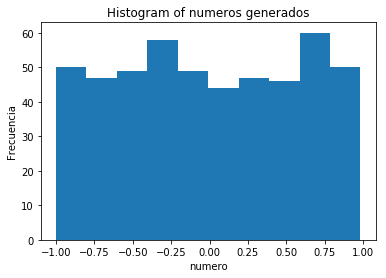

In [89]:
import matplotlib
import matplotlib.pyplot as plt
N = 500  # no of samples
num_bins = 10 # no of bins
x = range(N)
y = [random.uniform(-1,1) for i in x]


fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(y, num_bins, density=0)

# add a 'best fit' line
ax.set_xlabel('numero')
ax.set_ylabel('Frecuencia')
ax.set_title(r'Histogram of numeros generados')

# Tweak spacing to prevent clipping of ylabel
#fig.tight_layout()
plt.show()

<p>
Habitualmente estaremos interesandos en como cambia la distribución de los números aleatorios a medida que 
\( N\rightarrow\infty \) Y \( n\rightarrow\infty \). Una desventaja de esto es que \( \hat H(i) \) aumenta mientras que \( N \) disminuye, y esta descrese con \( n \).  La cantidad \( \hat H(i)/N \), llamada la frecuencia de conteo o solo frecuencia, alcanzará un límite finito cuando \( N\rightarrow\infty \).
Sin embargo, \( \hat H(i)/N \) será más pequeña a medida que incrementa el número de bins. La cantidad
    \( H(i) = \hat H(i)/(Nh) \) alcanza un limite finito y definido cuando \( N,n\rightarrow\infty \). La probabilidad de que un número aleatorio se encuentre dentro de un subintervalo \( i \) es luego \( \hat H(i)/N = H(i)h \).

<p>
Podemos visualizar \( H(i) \) como un diagrama de barras, llamado <em>histograma normalizado</em>.
A su vez, por utilidad, podemos definir una función \( p(x) \) a partir \( H(i) \):
\( p(x) = H(i) \) para \( x\in [a+ih, a+(i+1)h) \), \( i=0,\ldots,n-1 \).
A medida que \( n,N\rightarrow\infty \), \( p(x) \) se aproxima a la función de densidad de probabilidad 
de la distribución de los datos.
Por ejemplo, <code>random.uniform(a,b)</code> genera un número de datos a partir de una distribución en la cual \( [a,b) \), cuya función de densidad de probabilidad es constante, igual a \( 1/(b-a) \). A medida que incrementamos el valor \( n \) y \( N \), se expera \( p(x) \) se aproxime a la constante \( 1/(b-a) \).

En el siguiente ejemplo puede observar la frecuencia de los número aleatorios generados.

# Números aleatorios y el teorema del límite Central
Como se puede observar, la distribución obtenida a partir del ejercicio anterior es uniforme, sin embargo esto cambia cuando $ N\rightarrow\infty $ , la distribución deja de ser uniforme.
El teorema del límite central es un teorema fundamental de probabilidad y estadística. El teorema describe la distribución de la media de una muestra aleatoria proveniente de una población con varianza finita. Cuando el tamaño de la muestra es lo suficientemente grande, la distribución de las medias sigue aproximadamente una distribución normal. El teorema se aplica independientemente de la forma de la distribución de la población. Muchos procedimientos estadísticos comunes requieren que los datos sean aproximadamente normales. El teorema de límite central le permite aplicar estos procedimientos útiles a poblaciones que son considerablemente no normales. El tamaño que debe tener la muestra depende de la forma de la distribución original. Si la distribución de la población es simétrica, un tamaño de muestra de 5 podría producir una aproximación adecuada. Si la distribución de la población es considerablemente asimétrica, es necesario un tamaño de muestra más grande. Por ejemplo, la distribución de la media puede ser aproximadamente normal si el tamaño de la muestra es mayor que 50. Las siguientes gráficas muestran ejemplos de cómo la distribución afecta el tamaño de la muestra que se necesita.

En el siguiente ejercicio veremos el TCL en apliación, para eso calcularemos el promedio aritmético de una serie compuesta de $ n $ números aleatoreos, obtenidos a través de la función <code>random.uniform</code>. Esta operación la relizaremos $ N $ veces y en cada iteración aumentaremos la cantidad de elementos de la serie. Además, hemos agregado un registro del tiempo total de la operación.

In [104]:
def Average(lst): 
    return sum(lst) / len(lst) 
# Driver Code 
#lst = [15, 9, 55, 41, 35, 20, 62, 49] 
#average = Average(lst)


n = 50  # no of samples
num_bins = 10 # no of bins
x = range(n)
# 20 simulations 
N = 20

# In each simulation, there is one more number than the previous simulation
avg = []

for i in range(2,N):
    n = n+1
    a = [random.uniform(-1,1) for i in range(n)]
    avg.append(Average(a))


Si observamos el valor promedio varía con cada ejecución, los valores obtenidos estan en el rango esperado para la función promedio en el dominio definido para el intervalo -1,1.

In [105]:

# Average of the list average, after after each iteration
avg[1:10]

[-0.11560601447800127,
 -0.05253696186341247,
 -0.06843857732860538,
 -0.019869570749425053,
 0.13087954677693722,
 0.057356917560460005,
 -0.09980178729823455,
 -0.0071829595872944865,
 0.03762251211790987]

Sin embargo, según el teórema del limite central, cuando la cantidad de números muestreados es pequeña, la disperión frente al valor medio es mayor, mientras que al aumentar la cantidad de números muestreados, la dispersión comienza a disminuir frente a un valor central. Para ver si esto se cumple, analizemos la trayectoria de esta simulación

<IPython.core.display.Javascript object>


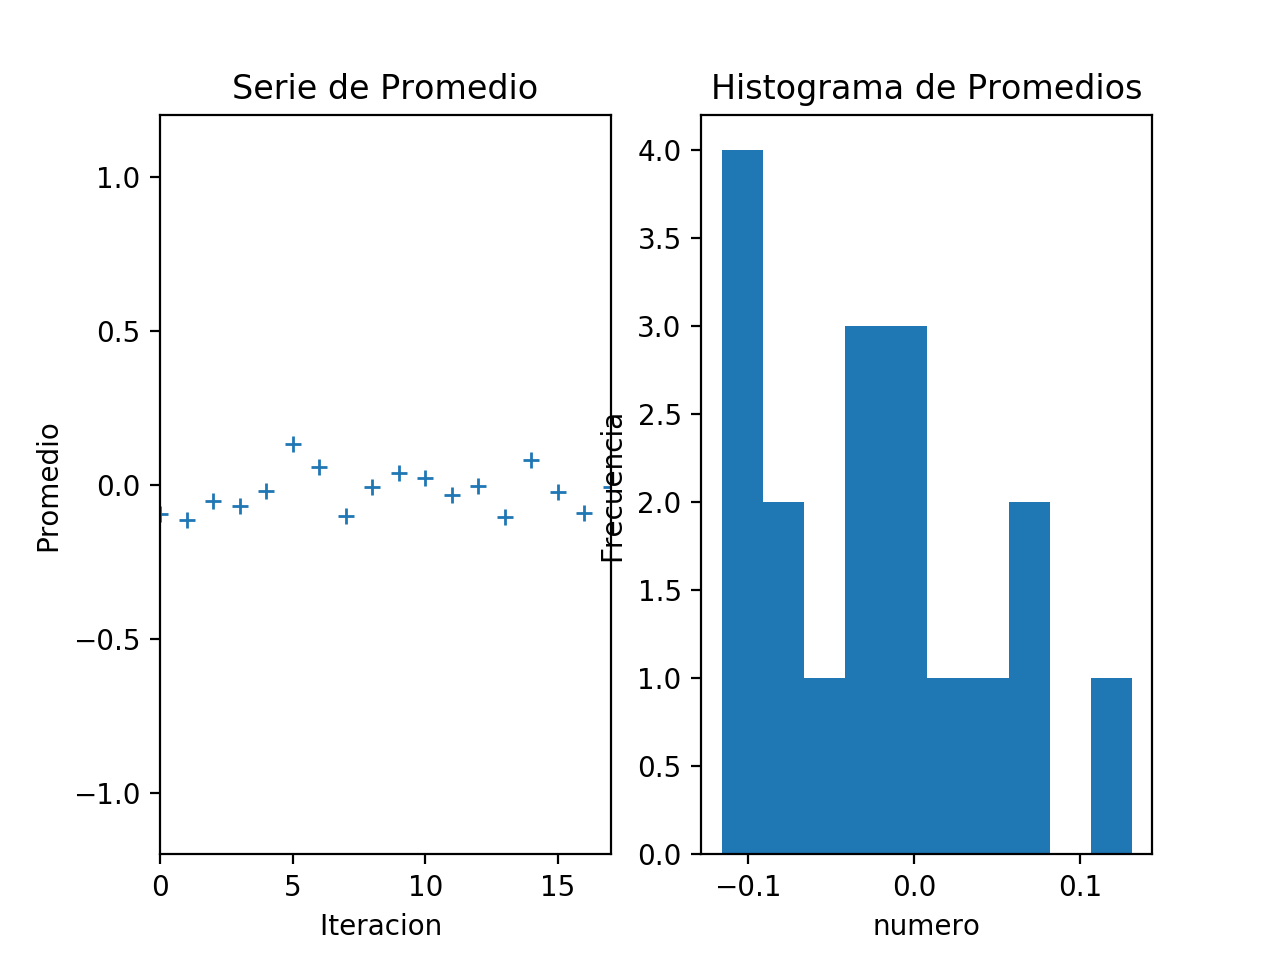

In [106]:
N = len(avg)  # no of samples
x = range(N)
y = avg 

f, (avgPlot, avgHistPlot) = plt.subplots(1, 2, sharey=False)
avgPlot.plot(x, y, '+')
avgPlot.set_xlabel('Iteracion ')
avgPlot.set_ylabel('Promedio') # promedio de promedios calculados
avgPlot.set_title('Serie de Promedio')
avgPlot.axis([0,N-1,-1.2,1.2])
# the histogram of the data
n, bins, patches = avgHistPlot.hist(y, num_bins, density=0)
# add a 'best fit' line
avgHistPlot.set_xlabel('numero')
avgHistPlot.set_ylabel('Frecuencia')
avgHistPlot.set_title(r'Histograma de Promedios')

plt.show()
# equivalent to 
#for i in range(1,len(avg)):
# print Average(avg[0:i])



La simulación anterior fue realizada con 20 iteraciones, observando que a pesar que en cada iteración aumenta la cantidad de elementos, estos no son suficientes para definir con claridad un valor reprentativo para el promedio de la distribución.

Para confirmar la ley de los grandes números, realizaremos una simulación con mayor número de iteraciones 


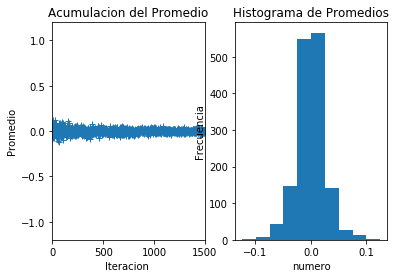

In [76]:
N = len(avg)  # no of samples
x = range(N)
y = avg 

f, (avgPlot, avgHistPlot) = plt.subplots(1, 2, sharey=False)
avgPlot.plot(x, y, '+')
avgPlot.set_xlabel('Iteracion ')
avgPlot.set_ylabel('Promedio') # promedio de promedios calculados
avgPlot.set_title(r'Acumulacion del Promedio')
avgPlot.axis([0,N-1,-1.2,1.2])
# the histogram of the data
n, bins, patches = avgHistPlot.hist(y, num_bins, density=0)
# add a 'best fit' line
avgHistPlot.set_xlabel('numero')
avgHistPlot.set_ylabel('Frecuencia')
avgHistPlot.set_title(r'Histograma de Promedios')

plt.show()
# equivalent to 
#for i in range(1,len(avg)):
# print Average(avg[0:i])




A continuación le mostramos un ejemplo que permite obtener la evolución de la media y la desviación estandar de un experimento como los efectuados anteriormente.
    

In [160]:
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.animation as animation
%matplotlib notebook
# Function that will plot the histogram, where current is the latest figure
def clt(current):
    # if animation is at the last frame, stop it
    plt.cla()
    if current == 500: 
        a.event_source.stop()

    plt.hist(avg[0:current])

    plt.gca().set_title('Expected value of the average')
    plt.gca().set_xlabel('Average from iteration')
    plt.gca().set_ylabel('Frequency')

    plt.annotate('Iteracion = {}'.format(current), [3,27])
    


def Average(lst): 
    return sum(lst) / len(lst) 
# Driver Code 
#lst = [15, 9, 55, 41, 35, 20, 62, 49] 
#average = Average(lst)


n = 50  # no of samples
num_bins = 10 # no of bins
x = range(n)
# 500 simulations 
N = 1500

# measure process time
tc0 = time.clock()

# measure wall time
tt0 = time.time()

# In each simulation, there is one trial more than the previous simulation
avg = []
timeL = []
for i in range(2,N):
    n = n+1
    a = [random.uniform(-1,1) for i in range(n)]
    avg.append(Average(a))
    timeL.append(time.time() - tt0)
print time.clock(), "seconds process", time.time() - tt0, "seconds wall"

204.973245 seconds process 0.563697099686 seconds wall


y seguiremos visualmente la trayectoria de los resultdos. Para esto hemos recurrido a la función <code>FuncAnimation</code> de matlibplot, en conjunto con nuestros conocimientos de programación.

<IPython.core.display.Javascript object>


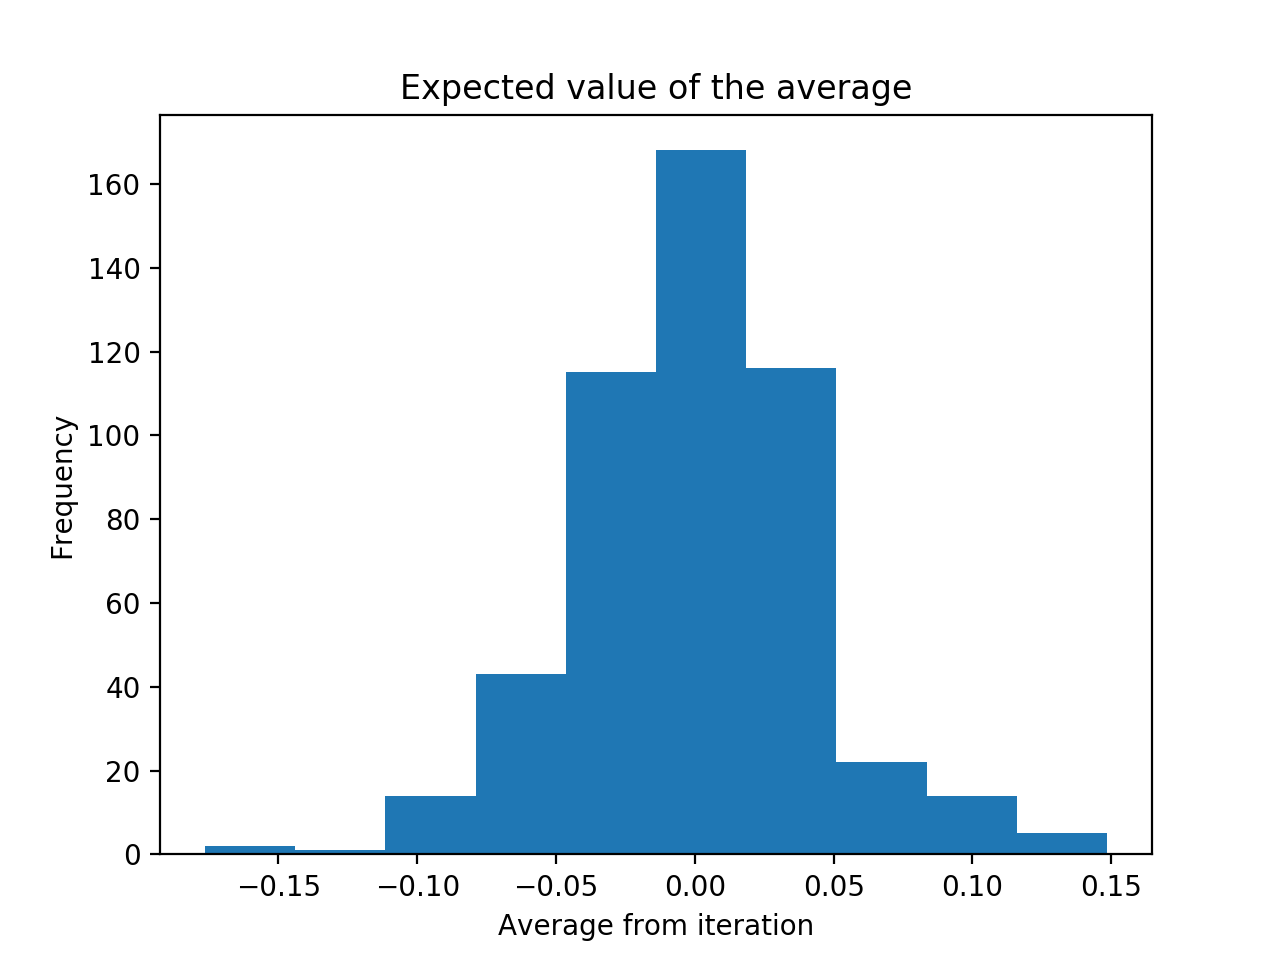

In [161]:
fig = plt.figure()
a = animation.FuncAnimation(fig, clt, interval=1)

Como puede notar, al aumentar la cantidad de números aleatoreos muestreados, la función promedio comienza a disminuir la dispersión de los valores obtenidos, concentrando la mayor cantidad de resultados en un valor central. Cumpliendo no solo con la ley del limite central, sino también con la ley de los grandes números.

a medida que aumentamos las iteraciones, para este caso el número de elementos sobre el cual calculamos el promedio, los valores comienzan a poblar con mayor frecuencia un valor centra, alcanzando lo que llamamos una distribución normal, la cual podemos describir a través de distinto parámetros estadísticos.

# Distribucion Normal
La Distribución Normal, o también llamada Distribución de Gauss, es aplicable a un amplio rango de problemas, lo que la convierte en la distribución más utilizada en estadística; esta dada por la formula:

$$ p(x;\mu, \sigma^2) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-1}{2}\left(\frac{x - \mu}{\sigma} \right)^2}$$

En dónde μ es el parámetro de ubicación, y va a ser igual a la media aritmética, σ es la desviación estándar y σ2 la varianza. 

Como ejemplo, hemos escrito el siguiente código, que permite calcular una distribución teórica a partir de los valores de la desviación estandar y la media.
``` 
    def pdfx(x, mu=0.0, sigma=0.1):
      x = float(x - mu) / sigma
      return math.exp(-x*x/2.0) / math.sqrt(2.0*math.pi) / sigma
```


# La media y la desviacion estandar
Como se observa en las ecuaciones estudiadas, la media y la desviación estandar son parámetros fundamentales al momento de definir una distribución.

La formula de la media se puede calcular 
a partir de un conjunto de $ n $ números $ x_0,x_1,\ldots,x_{n-1} $:

$$
\begin{equation}
x_m = \frac{1}{n}\sum_{j=0}^{n-1} x_j
\tag{1}
\end{equation}
$$

La cantidad de dispersion (spreading) de los valores de $ x_i $ al rededor de la media $ x_m $
puede ser estimada a partir de la <em>varianza</em>,

$$
\begin{equation}
x_v = \frac{1}{n}\sum_{j=0}^{n-1} (x_j - x_m)^2
\tag{2}
\end{equation}
$$

Los textos de estadistica indican que es "más" apropiado divivir por
$ n-1 $ en vez de $ n $, (puede discutir de ello en sus informes), pero no lo consideraremos para estos ejercicions.
Una variante de la ecuación dos <a href="#mjx-eqn-2">(2)</a> es

$$
\begin{equation}
x_v = \frac{1}{n}\left(\sum_{j=0}^{n-1} x_j^2\right) -  x_m^2
\tag{3}
\end{equation}
$$

Esta forma de reescribir la formula permite que, a medida que el experimento estadistica progresa y $ n $ aumenta, registrar el valor de las sumas

$$
\begin{equation}
s_m= \sum_{j=0}^{q-1} x_j,\quad s_v = \sum_{j=0}^{q-1} x_j^2
\tag{4}
\end{equation}
$$

y luego, computar y mostrar de forma eficiente los estimados de la media y la varianza de $ q $ muestras 

$$
\begin{equation}
x_m = s_m/q,\quad x_v = s_v/q - s_m^2/q^2
\tag{5}
\end{equation}
$$

<p>
La <em>desviación estandar</em>

$$
\begin{equation}
x_s = \sqrt{x_v}
\tag{6}
\end{equation}
$$

Es usualmente una forma alternativa de describir la varianza, ya que ambas tienen las mismas unidades.
Una forma de expresar la cantidad incerteza $ x $, basado en un dataset 
$ x_0,\ldots,x_{n-1} $, desde simulaciones o datos reales es  $ x_m \pm x_s $. Esto significa que $ x $ tiene una incerteza de una desviación estandar $ x_s $ hacia ambos lados del valor medio (media) $ x_m $.


Como se observa en el programa que se encuentra a continuación, esta forma de escribir la media y la desviación estandar nos permiten observar rapidamente el valor de tendencia central al cual converge la muestra, como a su vez el valor de dispersion de los mismos. 

In [72]:
import sys
N = 300
import random
from math import sqrt
sm = 0; sv = 0
for q in range(1, N+1):
    x = random.uniform(-1, 1)
    sm += x
    sv += x**2

    # Write out mean and st.dev. 10 times in this loop
    if q % (N/10) == 0:
        xm = sm/q
        xs = sqrt(sv/q - xm**2)
        print '%10d mean: %12.5e  stdev: %12.5e' % (q, xm, xs)

        30 mean:  1.14270e-01  stdev:  5.80508e-01
        60 mean:  2.62045e-02  stdev:  5.67285e-01
        90 mean:  5.12727e-02  stdev:  5.69863e-01
       120 mean:  2.34298e-02  stdev:  5.75864e-01
       150 mean:  4.66195e-02  stdev:  5.97584e-01
       180 mean:  4.79578e-02  stdev:  5.92256e-01
       210 mean:  3.52132e-02  stdev:  5.78267e-01
       240 mean:  5.72783e-02  stdev:  5.82183e-01
       270 mean:  5.81076e-02  stdev:  5.83643e-01
       300 mean:  4.44426e-02  stdev:  5.91078e-01


A partir de los resultados se puede observar que a medida que aumenta el muestreo, la media disminuye y se aproxima a cero, como es de esperarse ya que los números se están generando en el intervalo 
entre \( -1 \) y \( 1 \), cuando $N\rightarrow\infty $.



Ahora podemos combinar todo y observar en que momento alcanzamos una distribución normal de datos, por ejemplo

675.497474 seconds process 24.1507639885 seconds wall
-0.00846619881195


<IPython.core.display.Javascript object>


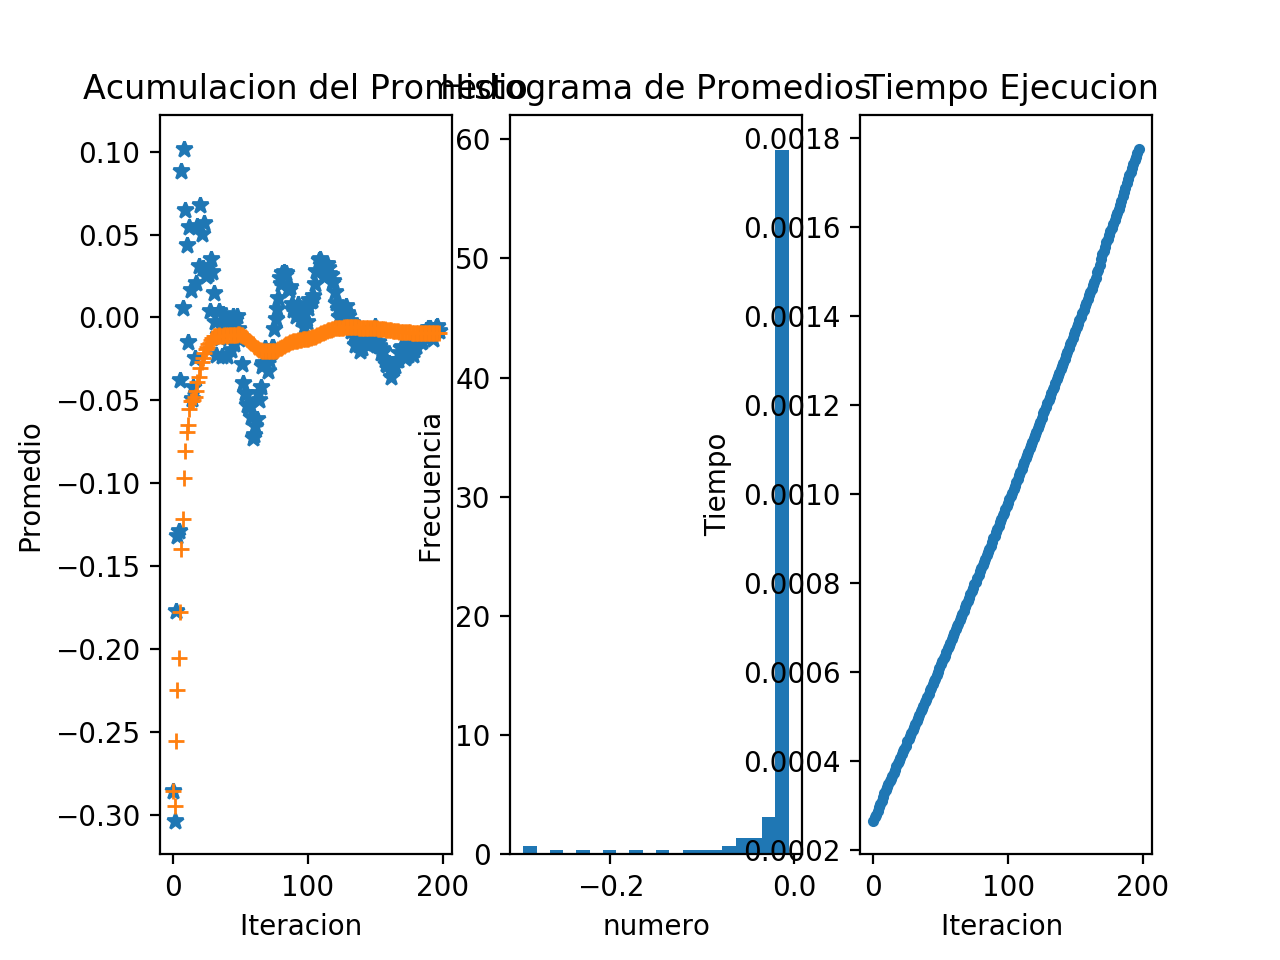

In [260]:
# One iteration, just uniform numbers
import sys
import math
import matplotlib.pyplot as plt
import random
from math import sqrt
        
# normal distribution range from values
def norm1(values,mu,sigma):
        dy = []
        for i in values:
         dy.append(1/(sigma * math.sqrt(2 * math.pi)) * math.exp( - (i - mu)**2 / (2 * sigma**2) ))
        return dy
        
# average of a list
def Average(lst): 
    return sum(lst) / len(lst) 


# N replicas from 1 to N
# return list of averages(N)
timeL = []
timeL.append(time.time() - tt0)
print time.clock(), "seconds process", time.time() - tt0, "seconds wall"

N = 30000   # samples
M = 200
num_bins = 20 
    
sm = 0; sv = 0
values = []    # values arrays, 1 per iteration
valuesM = []   # media of the values of each iteration
valuesAvM = [] # Average value of the values until that iteration

# measure process time
tc0 = time.clock()

# measure wall time
tt0 = time.time()
timeL=[]

# M iterations, 200
for q in range(1, M-1):
    time.clock()
    x = random.uniform(-1, 1) # one value
    values.append(x)          # list of values, growth with iter
    sm += x                   # to calculate media
    sv += x**2                # to calculate sd
    # Write out mean and st.dev. print 10 times in this loop
    xm = sm/q
    xs = sqrt(sv/q - xm**2)
    if q % (N/10) == 0:
     print '%10d mean: %12.5e  stdev: %12.5e' % (q, xm, xs)
     print time.clock(), "seconds process", time.time() - tt0, "seconds wall"
    #Vary the mean and SD to generate different plots
    valuesM.append(xm)       # running mean
    valuesAvM.append(Average(valuesM)) #  running average mean
    timeL.append(time.time() - tt0)
    
mean = xm
sd = xs

print mean

f, (avgPlot, avgHistPlot, timetPlot) = plt.subplots(1, 3, sharey=False)
avgPlot.plot(range(M-2), valuesM, '*')
#avgPlot.plot(range(N), valuesM, '.')
avgPlot.plot(range(M-2), valuesAvM, '+')
avgPlot.set_xlabel('Iteracion ')
avgPlot.set_ylabel('Promedio') # promedio de promedios calculados
avgPlot.set_title(r'Acumulacion del Promedio')
#avgPlot.axis([0,N-1,-1.2,1.2])
# the histogram of the data
n, bins, patches = avgHistPlot.hist(valuesAvM, num_bins, density=1)
# add a 'best fit' line
avgHistPlot.set_xlabel('numero')
avgHistPlot.set_ylabel('Frecuencia')
avgHistPlot.set_title(r'Histograma de Promedios')

timetPlot.plot(range(len(timeL)), timeL, '.')
timetPlot.set_xlabel('Iteracion ')
timetPlot.set_ylabel('Tiempo') # promedio de promedios calculados
timetPlot.set_title(r' Tiempo Ejecucion')


plt.show()

Veamos ahora si se cumple el teorema del limite central, el cual nos indica que cuando N es grande, el resultado debe llegar a una distribución normal, independiente del tipo de distribución de los datos originales

<IPython.core.display.Javascript object>


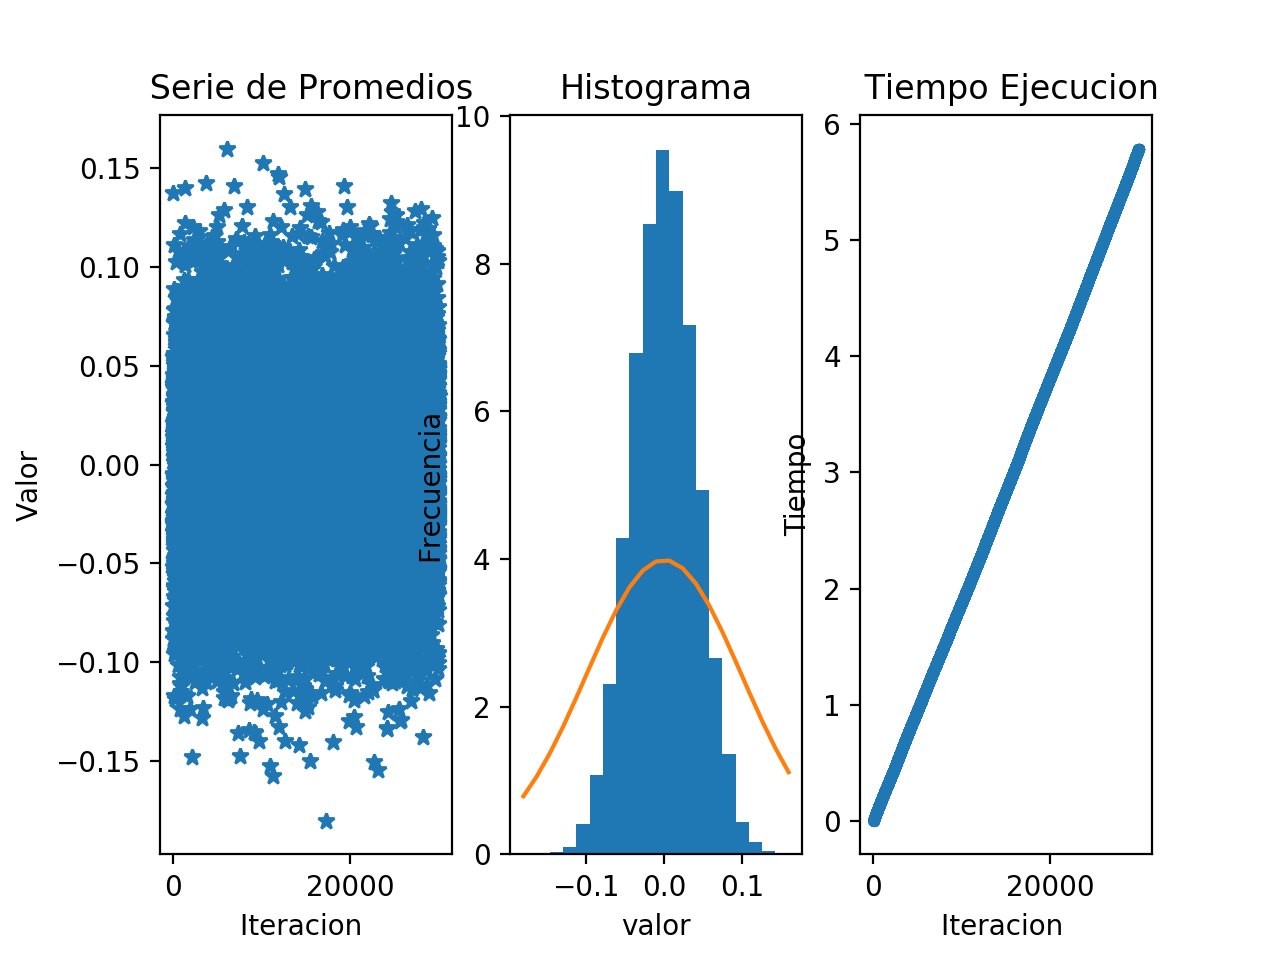

In [261]:
import sys
import math
import matplotlib.pyplot as plt
import random
from math import sqrt
        
# normal distribution range from values
def norm1(values,mu,sigma):
        dy = []
        for i in values:
         dy.append(1/(sigma * math.sqrt(2 * math.pi)) * math.exp( - (i - mu)**2 / (2 * sigma**2) ))
        return dy
        
# average of a list
def Average(lst): 
    return sum(lst) / len(lst) 

def meanSerie(N):
 serie=[random.uniform(-1,1) for i in range(N)]
 sm = 0
 sv = 0
 q=len(serie)
 for x in serie:
    sm += x                   # to calculate media
    sv += x**2                # to calculate sd
    # Write out mean and st.dev. print 10 times in this loop
    xm = sm/q
    xs = sqrt(sv/q - xm**2)
    #print '%10d mean: %12.5e  stdev: %12.5e' % (q, xm, xs)
    #print time.clock(), "seconds process", time.time() - tt0, "seconds wall"
 return xm


# N replicas from 1 to N
# return list of averages(N)


timeL = []
#timeL.append(time.time() - tt0)
#print time.clock(), "seconds process", time.time() - tt0, "seconds wall"

N = 30000   # samples
M = 200     #inner iterations
num_bins = 20 
    
sm = 0; sv = 0
values = []    # values arrays, 1 per iteration
valuesM = []   # media of the values of each iteration
valuesAvM = [] # Average value of the values until that iteration

# measure process time
tc0 = time.clock()

# measure wall time
tt0 = time.time()


# Here we added a while loop to generate
# N random series of max random.M(1,100) elements
# but now with numpy
# N*M
i = 1
while i < N:
  #print(i)
  #M=random.randint(2,100)
  values.append(meanSerie(M)) 
  timeL.append(time.time() - tt0)
  i += 1


mean = 0
sd = 0.1

f, (avgPlot, avgHistPlot, timetPlot) = plt.subplots(1, 3, sharey=False)
avgPlot.plot(range(len(values)), values, '*')

avgPlot.set_xlabel('Iteracion ')
avgPlot.set_ylabel('Valor') # promedio de promedios calculados
avgPlot.set_title(' Serie de Promedios')
# the histogram of the data

n, bins, patches = avgHistPlot.hist(values, num_bins, density=1)
# add a 'best fit' line
avgHistPlot.set_xlabel('valor')
avgHistPlot.set_ylabel('Frecuencia')
avgHistPlot.set_title('Histograma')

# normal population shape based on mean and sd
valuesNormPlot = norm1(bins, mean, sd)
avgHistPlot.plot(bins,valuesNormPlot)

timetPlot.plot(range(len(timeL)), timeL, '.')
timetPlot.set_xlabel('Iteracion ')
timetPlot.set_ylabel('Tiempo') # promedio de promedios calculados
timetPlot.set_title(r' Tiempo Ejecucion')

plt.show()

Ahora con una serie de tamano variables

<IPython.core.display.Javascript object>


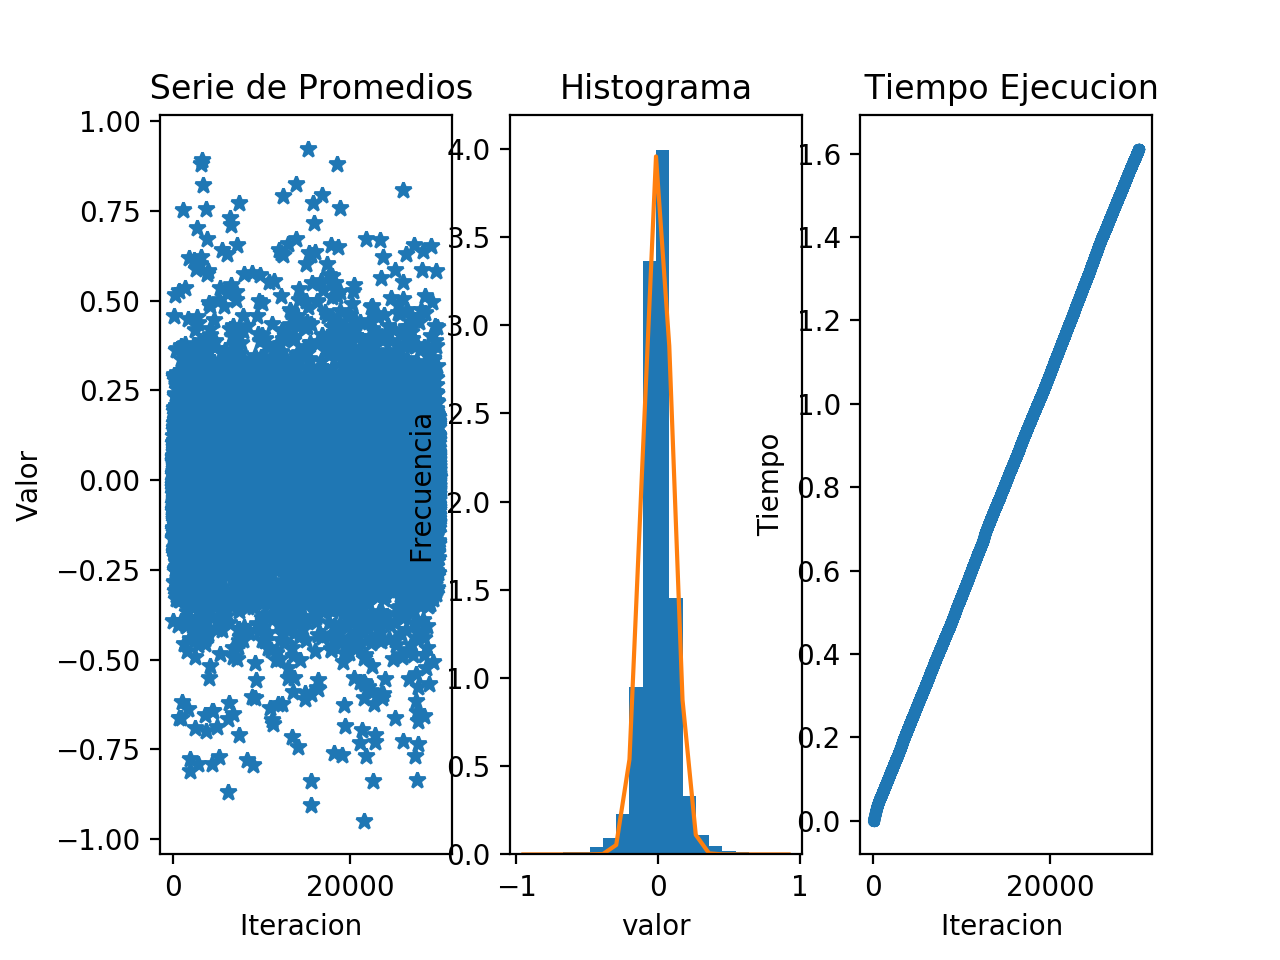

In [262]:
import sys
import math
import matplotlib.pyplot as plt
import random
from math import sqrt
        
# normal distribution range from values
def norm1(values,mu,sigma):
        dy = []
        for i in values:
         dy.append(1/(sigma * math.sqrt(2 * math.pi)) * math.exp( - (i - mu)**2 / (2 * sigma**2) ))
        return dy
        
# average of a list
def Average(lst): 
    return sum(lst) / len(lst) 

def meanSerie(N):
 serie=[random.uniform(-1,1) for i in range(N)]
 sm = 0
 sv = 0
 q=len(serie)
 for x in serie:
    sm += x                   # to calculate media
    sv += x**2                # to calculate sd
    # Write out mean and st.dev. print 10 times in this loop
    xm = sm/q
    xs = sqrt(sv/q - xm**2)
    #print '%10d mean: %12.5e  stdev: %12.5e' % (q, xm, xs)
    #print time.clock(), "seconds process", time.time() - tt0, "seconds wall"
 return xm


# N replicas from 1 to N
# return list of averages(N)


timeL = []
#timeL.append(time.time() - tt0)
#print time.clock(), "seconds process", time.time() - tt0, "seconds wall"

N = 30000   # samples
M = 200     #inner iterations
num_bins = 20 
    
sm = 0; sv = 0
values = []    # values arrays, 1 per iteration
valuesM = []   # media of the values of each iteration
valuesAvM = [] # Average value of the values until that iteration

# measure process time
tc0 = time.clock()

# measure wall time
tt0 = time.time()


# Here we added a while loop to generate
# N random series of max random.M(1,100) elements
# but now with numpy
# N*M
i = 1
while i < N:
  #print(i)
  M=random.randint(2,100)
  values.append(meanSerie(M)) 
  timeL.append(time.time() - tt0)
  i += 1


mean = 0
sd = 0.1

f, (avgPlot, avgHistPlot, timetPlot) = plt.subplots(1, 3, sharey=False)
avgPlot.plot(range(len(values)), values, '*')

avgPlot.set_xlabel('Iteracion ')
avgPlot.set_ylabel('Valor') # promedio de promedios calculados
avgPlot.set_title(' Serie de Promedios')
# the histogram of the data

n, bins, patches = avgHistPlot.hist(values, num_bins, density=1)
# add a 'best fit' line
avgHistPlot.set_xlabel('valor')
avgHistPlot.set_ylabel('Frecuencia')
avgHistPlot.set_title('Histograma')

# normal population shape based on mean and sd
valuesNormPlot = norm1(bins, mean, sd)
avgHistPlot.plot(bins,valuesNormPlot)

timetPlot.plot(range(len(timeL)), timeL, '.')
timetPlot.set_xlabel('Iteracion ')
timetPlot.set_ylabel('Tiempo') # promedio de promedios calculados
timetPlot.set_title(r' Tiempo Ejecucion')

plt.show()

Veamos que sucede cuando utilizamos Numpy para manejar nuestros arreglos como vectores

691.374105 seconds process 163.98679781 seconds wall


<IPython.core.display.Javascript object>


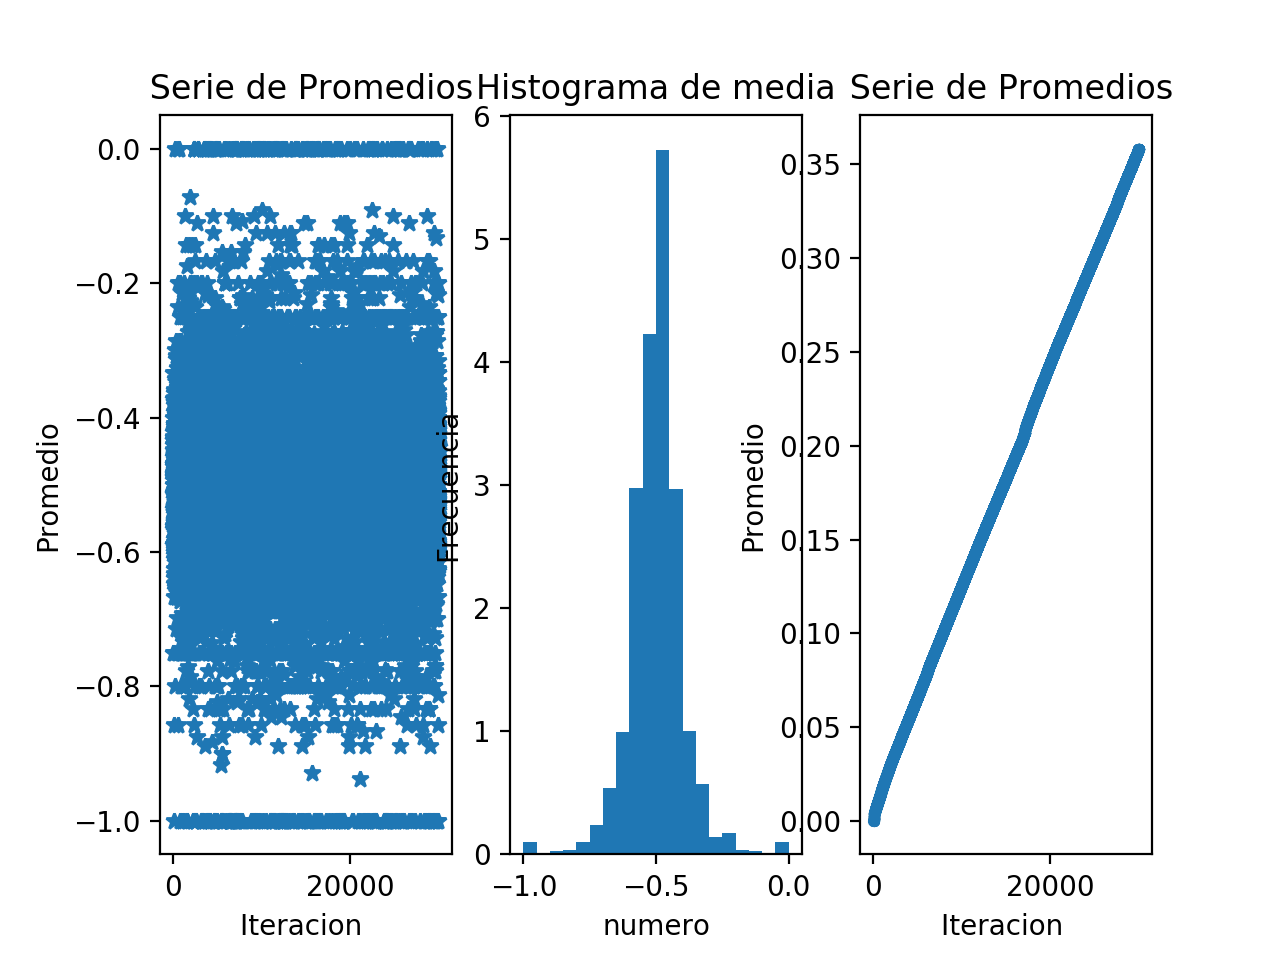

In [264]:
import sys
import math
import matplotlib.pyplot as plt
import random
from math import sqrt
import numpy as np
        
class norm1:
    def __init__(self, a1, b1, c1):
        self.a1 = a1
        self.b1 = b1
        self.c1 = c1
        
    def dist_curve(self):
        plt.plot(self.c1, 1/(self.b1 * np.sqrt(2 * np.pi)) *
            np.exp( - (self.c1 - self.a1)**2 / (2 * self.b1**2) ), linewidth=2, color='y')
        #plt.show()


timeL = []
#timeL.append(time.time() - tt0)
print time.clock(), "seconds process", time.time() - tt0, "seconds wall"

N = 30000   # samples
num_bins = 20 
values = []    # values arrays, 1 per iteration

# measure process time
tc0 = time.clock()

# measure wall time
tt0 = time.time()

# Here we added a while loop to generate
# N random series of max random.M(1,100) elements
# but now with numpy
i = 1
while i < N:
  #print(i)
  M=random.randint(2,100)
  values.append(np.mean(np.random.randint(-1,1,M))) 
  timeL.append(time.time() - tt0)
  i += 1

#c = np.random.normal(mean1, sd1, 3000)
mean = 0
sd = 0.1

f, (avgPlot, avgHistPlot, timetPlot) = plt.subplots(1, 3, sharey=False)
avgPlot.plot(range(len(values)), values, '*')
#avgPlot.plot(range(N), valuesM, '.')
#avgPlot.plot(range(N), valuesAvM, '+')
avgPlot.set_xlabel('Iteracion ')
avgPlot.set_ylabel('Promedio') # promedio de promedios calculados
avgPlot.set_title(r' Serie de Promedios')
#avgPlot.axis([0,N-1,-1.2,1.2])
# the histogram of the data


#w1, x1, z1 = plt.hist(values, 50, normed=True) #hist

#hist1 = norm1(mean1, sd1, x1)
#plot1 = hist1.dist_curve()


n, bins, patches = avgHistPlot.hist(values, num_bins, density=1)
hist1 = norm1(mean, sd, bins)
#plot1 = hist1.dist_curve()

# add a 'best fit' line
avgHistPlot.set_xlabel('numero')
avgHistPlot.set_ylabel('Frecuencia')
avgHistPlot.set_title(r'Histograma de media')
# normal population shape based on mean and sd
#valuesNormPlot = norm1(bins, mean, sd)
#avgHistPlot.plot(bins,valuesNormPlot)
#plot1 = hist1.dist_curve()


timetPlot.plot(range(len(values)), timeL, '.')
#avgPlot.plot(range(N), valuesM, '.')
#avgPlot.plot(range(N), valuesAvM, '+')
timetPlot.set_xlabel('Iteracion ')
timetPlot.set_ylabel('Promedio') # promedio de promedios calculados
timetPlot.set_title(r' Serie de Promedios')
#avgPlot.axis([0,N-1,-1.2,1.2])
# the histogram of the data

plt.show()

Numpy nos permite obtener directamente números aleatorios con una distribución data.

723.682012 seconds process 24.1108059883 seconds wall


<IPython.core.display.Javascript object>


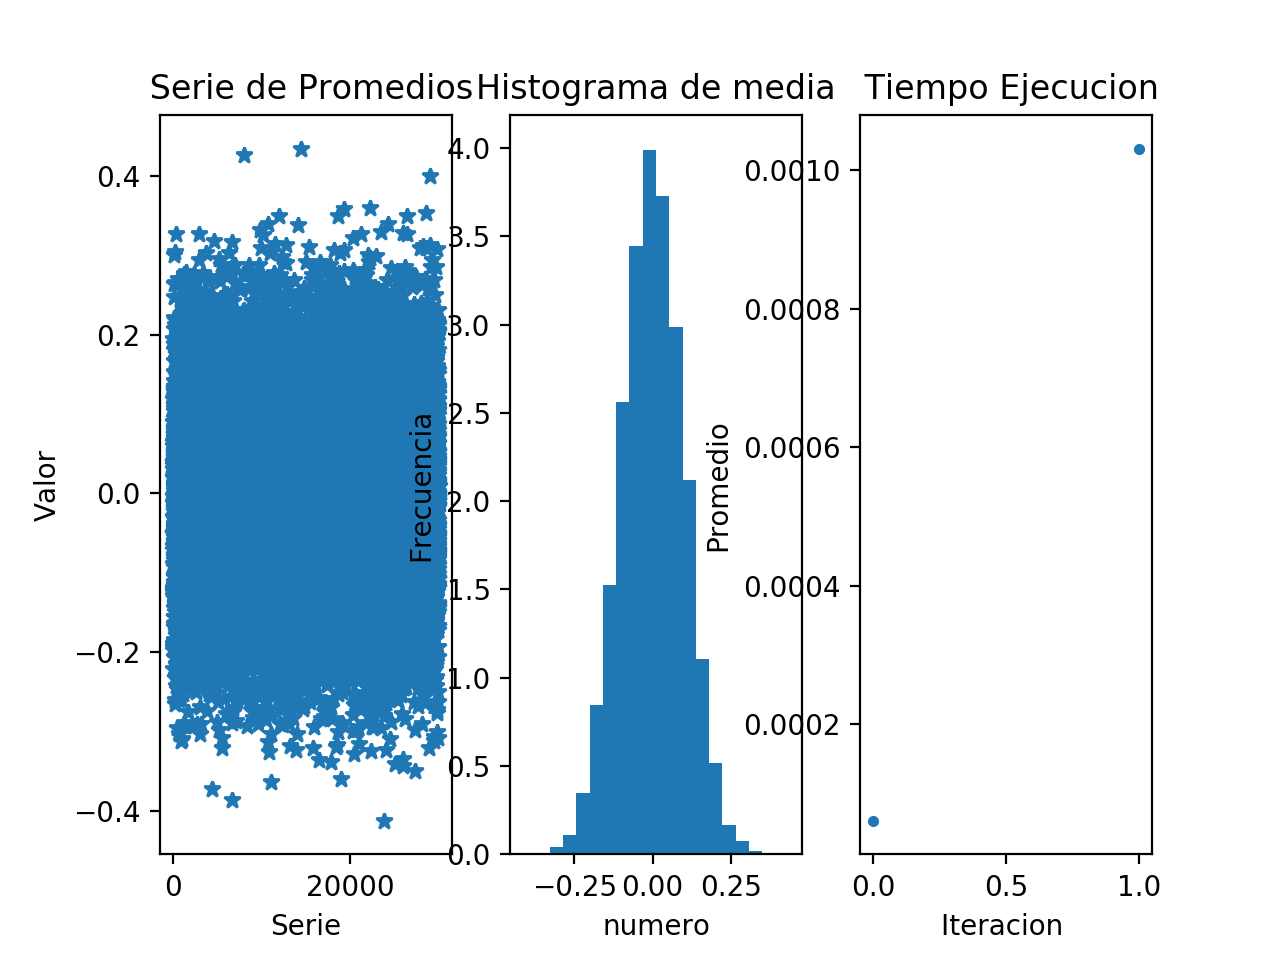

In [290]:
import sys
import math
import matplotlib.pyplot as plt
import random
from math import sqrt
import numpy as np
        
class norm1:
    def __init__(self, a1, b1, c1):
        self.a1 = a1
        self.b1 = b1
        self.c1 = c1
        
    def dist_curve(self):
        plt.plot(self.c1, 1/(self.b1 * np.sqrt(2 * np.pi)) *
            np.exp( - (self.c1 - self.a1)**2 / (2 * self.b1**2) ), linewidth=2, color='y')
        #plt.show()


timeL = []
#timeL.append(time.time() - tt0)
print time.clock(), "seconds process", time.time() - tt0, "seconds wall"

N = 30000   # samples
num_bins = 20 
values = []    # values arrays, 1 per iteration

# measure process time
tc0 = time.clock()

# measure wall time
tt0 = time.time()

#i = 1
#while i < 1000:
#  #print(i)
#  M=random.randint(1,100)
#  values.append(np.mean(np.random.randint(-1,1,M))) 
#  timeL.append(time.time() - tt0)
#  i += 1

#c = np.random.normal(mean1, sd1, 3000)
timeL.append(time.time() - tt0)


mean = 0
sd = 0.1
values = np.random.normal(mean, sd, N)
timeL.append(time.time() - tt0)

f, (avgPlot, avgHistPlot, timetPlot) = plt.subplots(1, 3, sharey=False)
avgPlot.plot(range(len(values)), values, '*')
#avgPlot.plot(range(N), valuesM, '.')
#avgPlot.plot(range(N), valuesAvM, '+')
avgPlot.set_xlabel('Serie')
avgPlot.set_ylabel('Valor') # promedio de promedios calculados
avgPlot.set_title(r' Serie de Promedios')


n, bins, patches = avgHistPlot.hist(values, num_bins, density=1)

# add a 'best fit' line
avgHistPlot.set_xlabel('numero')
avgHistPlot.set_ylabel('Frecuencia')
avgHistPlot.set_title(r'Histograma de media')
# normal population shape based on mean and sd
#valuesNormPlot = norm1(bins, mean, sd)
#avgHistPlot.plot(bins,valuesNormPlot)
#plot1 = hist1.dist_curve()


timetPlot.plot(range(len(timeL)), timeL, '.')
timetPlot.set_xlabel('Iteracion ')
timetPlot.set_ylabel('Promedio') # promedio de promedios calculados
timetPlot.set_title(r' Tiempo Ejecucion')

plt.show()

<IPython.core.display.Javascript object>


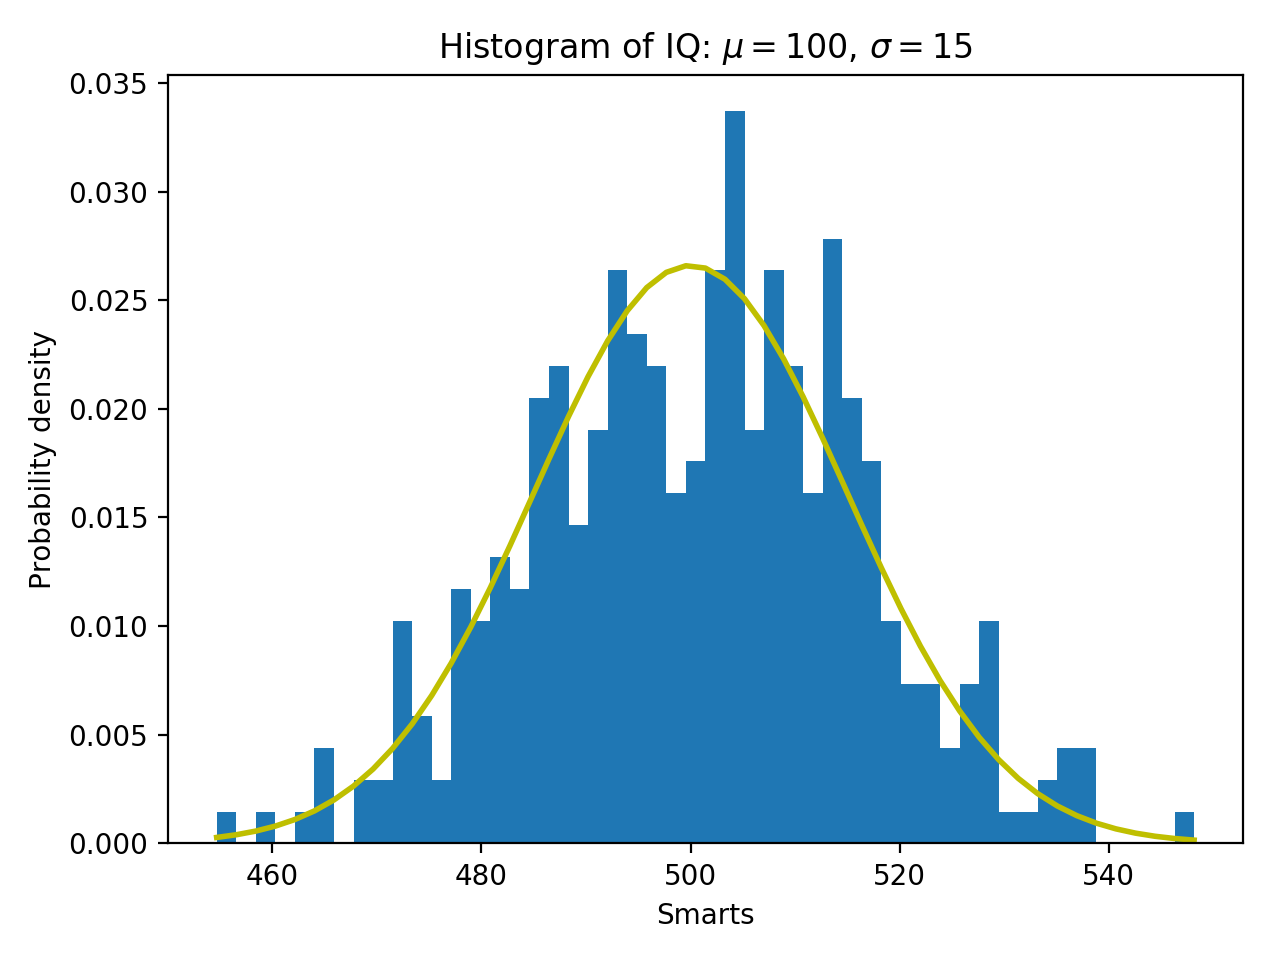

In [286]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680802)


class norm1:
    def __init__(self, a1, b1, c1):
        self.a1 = a1
        self.b1 = b1
        self.c1 = c1
        
    def dist_curve(self):
        plt.plot(self.c1, 1/(self.b1 * np.sqrt(2 * np.pi)) *
            np.exp( - (self.c1 - self.a1)**2 / (2 * self.b1**2) ), linewidth=2, color='y')
        #plt.show()



# example data
mu = 500  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(365)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
hist1 = norm1(mu, sigma, bins)
plot1 = hist1.dist_curve()

ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

